# Imports

In [0]:
import pandas as pd
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

%matplotlib inline  
import matplotlib.pyplot as plt

# Gather Data

In [3]:
# Download the data file from UCI
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2020-05-03 10:51:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-05-03 10:51:40 (103 MB/s) - ‘iris.data’ saved [4551/4551]



In [4]:
# Take a look at the raw data
! head iris.data

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


# Pre-process the data

In [5]:
# Read the data into a dataframe
data = pd.read_csv('iris.data', names=['f1', 'f2', 'f3', 'f4', 'label'])
data.head()

,f1,f2,f3,f4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# One hot encode the labels
data = pd.concat([data, pd.get_dummies(data['label'])], axis=1)
del(data['label'])
data.head()

,f1,f2,f3,f4,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [0]:
# Create training and test sets
train = data.sample(frac=0.8,random_state=200) 
test = data.drop(train.index)

# Define the model

In [0]:
# MyNet defines our PyTorch neural network model
class MyNet(torch.nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):

        # call class constructor
        super(MyNet, self).__init__()

        # Use the nn package to create the layers of our network.
        # A first fully connected layer (fc1), a hidden layer (defined by 
        # the output/input sizes of our FC layers), and a second fully 
        # connected layer (fc2).
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):

        # We pass the input through the full connected layers and
        # apply our activation function.
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

In [0]:
# Intialize the model
model = MyNet(4, 8, 3)

In [0]:
# Our error/loss function. Note, this loss function actually includes
# a softmax activation (so we don't include it in the model definition).
criterion = nn.BCELoss()

# define our SGD optimizer
optimiser = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model

In [11]:
# define our feature and response variables
x = train[['f1','f2','f3','f4']].values
y = train[['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']].values
features = Variable(torch.from_numpy(x).float())
labels = Variable(torch.from_numpy(y).float())

# loop over our epochs
loss_values = []
for epoch in range(400):

  # clear the gradients
  optimiser.zero_grad()

  # calculate the predicted values
  predictions = model(features)

  # calculate our loss
  loss = criterion(predictions, labels)
  loss_values.append(loss.item())

  # implement our gradient-based updates to our
  # parammeters (putting them "back" into the model
  # via a "backward" update)
  loss.backward()
  optimiser.step()

  # Print some info
  if epoch % 20 == 0:
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, loss))

Epoch: 1 	Training Loss: 0.635214
Epoch: 21 	Training Loss: 0.476558
Epoch: 41 	Training Loss: 0.344433
Epoch: 61 	Training Loss: 0.278469
Epoch: 81 	Training Loss: 0.235722
Epoch: 101 	Training Loss: 0.200069
Epoch: 121 	Training Loss: 0.169631
Epoch: 141 	Training Loss: 0.144721
Epoch: 161 	Training Loss: 0.125178
Epoch: 181 	Training Loss: 0.110178
Epoch: 201 	Training Loss: 0.098690
Epoch: 221 	Training Loss: 0.089811
Epoch: 241 	Training Loss: 0.082850
Epoch: 261 	Training Loss: 0.077296
Epoch: 281 	Training Loss: 0.072786
Epoch: 301 	Training Loss: 0.069061
Epoch: 321 	Training Loss: 0.065941
Epoch: 341 	Training Loss: 0.063292
Epoch: 361 	Training Loss: 0.061014
Epoch: 381 	Training Loss: 0.059036


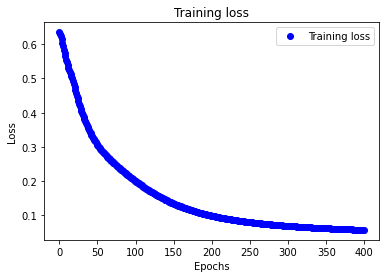

In [12]:
# Plot the training loss for each epoch to see how the model converged.
plt.plot(range(400), loss_values, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model

In [13]:
# Evaluate the model on the test set. 
x_test = Variable(torch.from_numpy(test[['f1','f2','f3','f4']].values).float())
y_test = Variable(torch.from_numpy(test[['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']].values).float())
out = model(x_test)
_, pred_idx = torch.max(out.data, 1)
_, obs_idx = torch.max(y_test.data, 1)

# Parse the results
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
predictions = []
observations = []
for idx, p in enumerate(pred_idx):
    predictions.append(species[p])
    observations.append(species[obs_idx[idx]])

# Calculate accuracy
acc = accuracy_score(observations, predictions)
print('Accuracy: ', acc)

Accuracy:  0.9666666666666667
